In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn

%matplotlib inline

from utils import tokenizer
from wordcloud import WordCloud
import nltk
from nltk import FreqDist
import json

In [24]:
# from: http://neuro.imm.dtu.dk/wiki/LabMT 
# url = 'http://www.plosone.org/article/fetchSingleRepresentation.action?uri=info:doi/10.1371/journal.pone.0026752.s001'
# labmt = pd.read_csv(url, skiprows=2, sep='\t', index_col=0)
# labmt.to_csv("data/labmt.csv")

labmt = pd.read_csv("data/labmt.csv")
 
average = labmt.happiness_average.mean()
happiness = (labmt.set_index("word").happiness_average - average).to_dict()
 
def score_emotion(text):
    words = tokenizer.tokenize_strip_non_words(text)
    return sum([happiness.get(word.lower(), 0.0) for word in words]) / len(words)

In [25]:
with open("data/metalness.json", "r") as f:
    metalness = json.load(f)
    f.close()
    
def score_metal(text):
    words = tokenizer.tokenize_strip_non_words(text)
    return sum(metalness.get(word,0) for word in words) / len(words)    

In [26]:
lyrics = pd.read_csv("data/lyrics.csv")

lyrics.sample(10)

,song_name,album_name,band_name,lyrics
48820,The Spindle,helengard,helengard,Evenfall will cloak the hills in darkness and ...
80306,No More Shadows From The Past,theawakening,narnia,He Died For Me On The Cross\nTook My Sins And ...
12469,Bloodsmear,threnody,woeoftyrants,"Crashing of thunder, considering the light of ..."
48844,Nocturnal Transcendency,sourceoforigin,decembermoon,I swoon as I ascend this lifeless body\nThough...
34066,Helter Skelter,coverfield,caliban,\nWhen I get to the bottom\nI go back to the t...
158238,Eat Me Alive,metalworks7393,judaspriest,\nWrapped tight around me\nLike a second flesh...
20194,Empire,wefight,arthemis,"\nReal world, everybody need salvation\nNo mat..."
74368,Traitors,ecophagy,martyrdefiled,There is nothing left for you here\nThe legion...
66490,He's God,asadogreturns,placeofskulls,What makes a man want to tear away within\nWhe...
123116,Time Stands Still,khronos,rottingchrist,Time stands still\nLike a sad young boy\nStari...


In [27]:
metallica_albums = {
    'andjusticeforall': 1988, 
    'deathmagnetic': 2008,
    'garageinc': 1998,
    'killemall': 1983,
    'load': 1996,
    'masterofpuppets': 1986,
    'metallicablackalbum': 1991, 
    'reload': 1997, 
    'ridethelightning': 1984,
}

In [28]:
metallica = (
    lyrics
    [lyrics.band_name == "metallica"]
    .groupby("album_name")
    .lyrics
    .apply(lambda x: " ".join(x))
    .reset_index()
)

metallica = metallica[metallica.album_name.isin(metallica_albums.keys())].copy()
metallica["year"] = metallica.album_name.apply(lambda x: metallica_albums.get(x))

metallica["metalness"] = metallica.lyrics.apply(score_metal)
metallica["emotion"] = metallica.lyrics.apply(score_emotion)

metallica.sort_values("year", inplace=True)

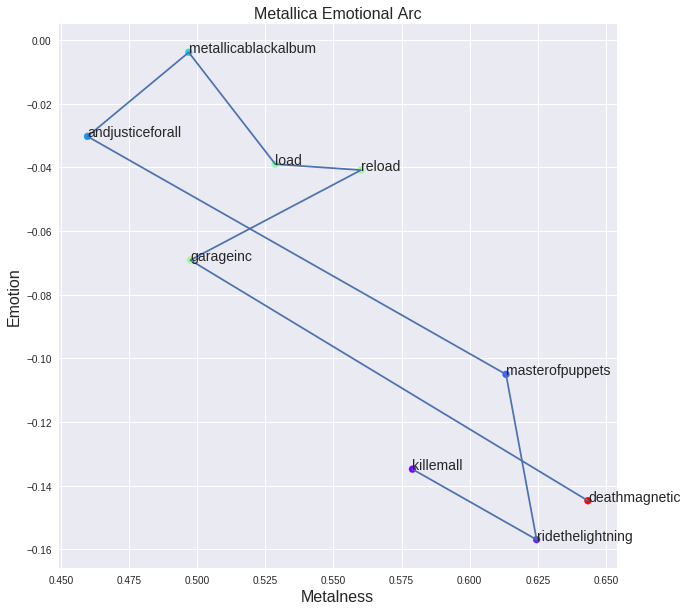

In [29]:
x = metallica.metalness.values
y = metallica.emotion.values
c = metallica.year.values
l = metallica.album_name.values

plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.scatter(x,y,c=c, cmap="rainbow")


for xx,yy,ll in zip(x,y, l):
    plt.annotate(ll, xy=(xx,yy), fontsize=14)
    
plt.title("Metallica Emotional Arc", fontsize=16)
plt.xlabel("Metalness", fontsize=16)
plt.ylabel("Emotion",fontsize=16)

plt.savefig("resources/metallica_arc.png", bbox_inches='tight')

In [30]:
ironmaiden_albums = {
    'amatteroflifeanddeath':2006, 
    'bravenewworld': 2000,
    'danceofdeath': 2003, 
    'fearofthedark': 1992,
    'ironmaiden': 1980, 
    'killers': 1981,
    'noprayerforthedying': 1990,
    'pieceofmind': 1983,
    'powerslave': 1984,
    'seventhsonofaseventhson': 1988,
    'somewhereintime': 1985,
    'thebookofsouls': 2015,
    'thefinalfrontier': 2010,
    'thenumberofthebeast': 1982,
    'thexfactor': 1995,
    'virtualxi': 1998,
}

In [31]:
ironmaiden = (
    lyrics
    [lyrics.band_name == "ironmaiden"]
    .groupby("album_name")
    .lyrics
    .apply(lambda x: " ".join(x))
    .reset_index()
)

ironmaiden = ironmaiden[ironmaiden.album_name.isin(ironmaiden_albums.keys())].copy()
ironmaiden["year"] = ironmaiden.album_name.apply(lambda x: ironmaiden_albums.get(x))

ironmaiden["metalness"] = ironmaiden.lyrics.apply(score_metal)
ironmaiden["emotion"] = ironmaiden.lyrics.apply(score_emotion)

ironmaiden.sort_values("year", inplace=True)

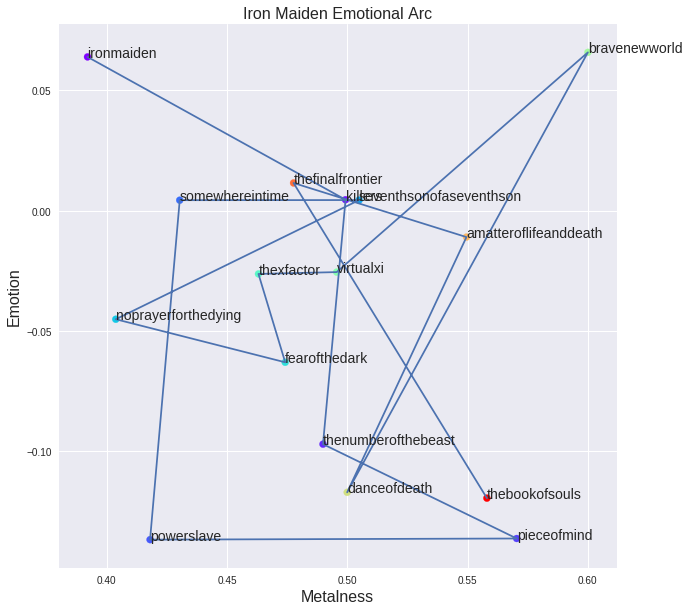

In [32]:
x = ironmaiden.metalness.values
y = ironmaiden.emotion.values
c = ironmaiden.year.values
l = ironmaiden.album_name.values

plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.scatter(x,y,c=c, cmap="rainbow")


for xx,yy,ll in zip(x,y, l):
    plt.annotate(ll, xy=(xx,yy), fontsize=14)
    
plt.title("Iron Maiden Emotional Arc", fontsize=16)
plt.xlabel("Metalness", fontsize=16)
plt.ylabel("Emotion",fontsize=16)

plt.savefig("resources/ironmaiden_arc.png", bbox_inches='tight')

# Harry Potter 

In [33]:
import glob

In [34]:
hp = sorted(glob.glob("data/hp/*.txt"))

In [35]:
hps = []
for h in hp:
    with open(h, "r") as f:
        txt = f.read()

        hps.append(txt)

In [36]:
potter = pd.DataFrame(
    data={
        "text":hps,
        "book": [(h.split("/")[-1]).split(".")[0] for h in hp]
    }
)

potter["metalness"] = potter.text.apply(score_metal)
potter["emotion"] = potter.text.apply(score_emotion)

In [37]:
potter

,book,text,metalness,emotion
0,1-philosophers_stone,Harry Potter\n\nand the Sorcerer’s Stone\n\n\n...,-0.050663,-0.042140
1,2-chamber_of_secrets,Harry Potter\n\n\n\nand the Chamber of Secrets...,-0.085449,-0.052835
2,3-prisoner_of_azkaban,Harry Potter\n\nand the Prisoner of Azkaban\n\...,-0.079367,-0.054717
3,4-goblet_of_fire,Harry Potter\n\nand the Goblet Of Fire\n\n\n\n...,-0.091896,-0.043938
4,5-order_of_the_pheonix,Harry Potter\n\n\n\nand the Order of the Phoen...,-0.096104,-0.048852
5,6-half_blood_prince,Harry Potter\n\n\n\nand the Half-Blood Prince\...,-0.093372,-0.048167
6,7-deathly_hallows,Harry Potter\n\n\n\nand the Deathly Hallows\n\...,-0.022593,-0.075042


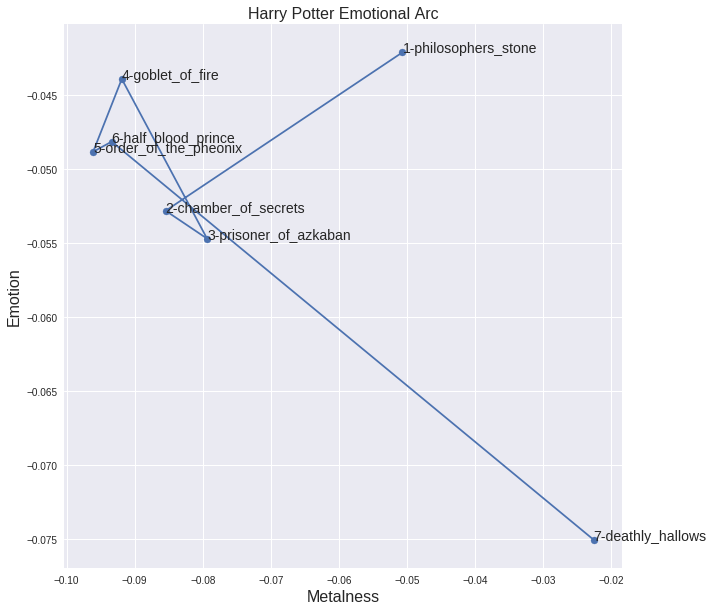

In [38]:
x = potter.metalness.values
y = potter.emotion.values
l = potter.book.values

plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.scatter(x,y)


for xx,yy,ll in zip(x,y, l):
    plt.annotate(ll, xy=(xx,yy), fontsize=14)
    
plt.title("Harry Potter Emotional Arc", fontsize=16)
plt.xlabel("Metalness", fontsize=16)
plt.ylabel("Emotion",fontsize=16)

plt.savefig("resources/harrypotter_arc.png", bbox_inches='tight')

# Word map in the Metal/Happy plane

In [49]:
h = pd.Series(happiness).rename("happyness")
m = pd.Series(metalness).rename("metalness")

In [50]:
mh = pd.concat([h,m], axis=1).dropna()

In [68]:
wds = set(mh.index.values)

In [69]:
ptr = FreqDist(w for w in tokenizer.tokenize_strip_non_words(" ".join(potter.text.values))
               if w in wds)
mtl = FreqDist(w for w in tokenizer.tokenize_strip_non_words(" ".join(metallica.lyrics.values))
               if w in wds)

In [100]:
wds = [x[0] for x in mtl.most_common(50)] + list(np.random.choice([x[0] for x in ptr.most_common(1000)], 50))

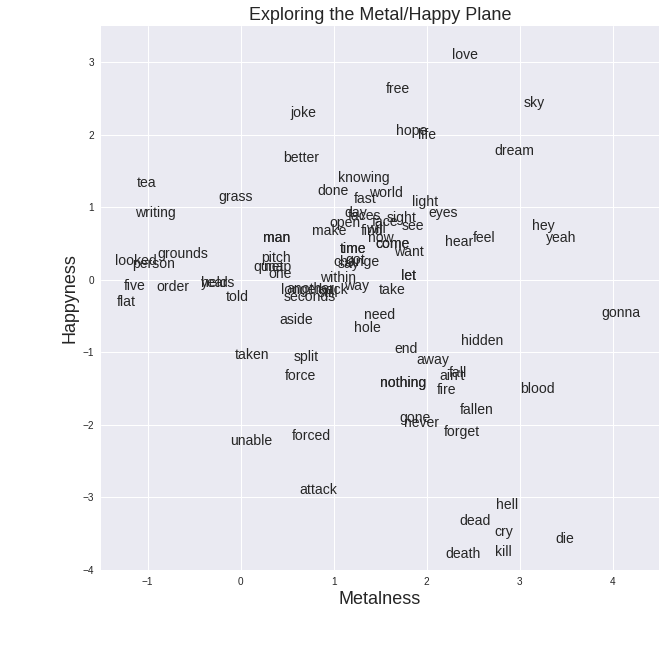

In [105]:
x = mh.ix[wds].metalness.values
y = mh.ix[wds].happyness.values
l = mh.ix[wds].index.values

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter([],[])

for xx,yy,ll in zip(x,y,l):
    ax.annotate(ll, (xx, yy), fontsize=14)
    
plt.xlim(-1.5,4.5)
plt.ylim(-4, 3.5)
    
plt.xlabel("Metalness", fontsize=18)
plt.ylabel("Happyness", fontsize=18)
plt.title("Exploring the Metal/Happy Plane", fontsize=18)

plt.savefig("happy_metal_plane.png")

In [115]:
metallica.iloc[4].lyrics.index("love")

1768

In [116]:
print(metallica.iloc[4].lyrics[1600:2000])

e

I'm your dream, mind astray
I'm your eyes while you're away
I'm your pain while you repay
You know it's sad but true

Hate
I'm your hate
I'm your hate when you want love
Pay
Pay the price
Pay, for nothing's fair

Hey
I'm your life
I'm the one who took you there
Hey
I'm your life
And I no longer care

I'm your dream, make you real
I'm your eyes when you must steal
I'm your pain when you can't fe


In [146]:
i = potter.iloc[2].text.index(" love ", i + 10)
i

100176

In [148]:
print(potter.iloc[2].text[i - 200:i + 200])

 infuriating Percy again.

They headed down to breakfast, where Mr. Weasley was reading the front page of the Daily Prophet with a furrowed brow and Mrs. Weasley was telling Hermione and Ginny about a love potion she’d made as a young girl. All three of them were rather giggly.

“What were you saying?” Ron asked Harry as they sat down.

“Later,” Harry muttered as Percy stormed in.

Harry had no ch


In [149]:
potter

,book,text,metalness,emotion
0,1-philosophers_stone,Harry Potter\n\nand the Sorcerer’s Stone\n\n\n...,-0.050663,-0.042140
1,2-chamber_of_secrets,Harry Potter\n\n\n\nand the Chamber of Secrets...,-0.085449,-0.052835
2,3-prisoner_of_azkaban,Harry Potter\n\nand the Prisoner of Azkaban\n\...,-0.079367,-0.054717
3,4-goblet_of_fire,Harry Potter\n\nand the Goblet Of Fire\n\n\n\n...,-0.091896,-0.043938
4,5-order_of_the_pheonix,Harry Potter\n\n\n\nand the Order of the Phoen...,-0.096104,-0.048852
5,6-half_blood_prince,Harry Potter\n\n\n\nand the Half-Blood Prince\...,-0.093372,-0.048167
6,7-deathly_hallows,Harry Potter\n\n\n\nand the Deathly Hallows\n\...,-0.022593,-0.075042


In [153]:
i = ironmaiden.iloc[8].lyrics.index("love ")
i

994

In [155]:
print(ironmaiden.iloc[8].lyrics[i - 100:i + 300])

 heaven - The thief's in your head....

Be quick!
Or be dead!
Be quick!
Or be dead!


 
She fell in love with his greasy machine
She leaned over wiped his kickstart clean
She'd never seen the beast before
But she left there wanting more more more

But when she was walking on down the road
She heard a sound that made her heart explode
He whispered to her to get on the back
"I'll take you on ride fr
